<a href="https://colab.research.google.com/github/lmhoang47/CS2225.CH1501/blob/lmhoang47/FaceDetectionFromWebCam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

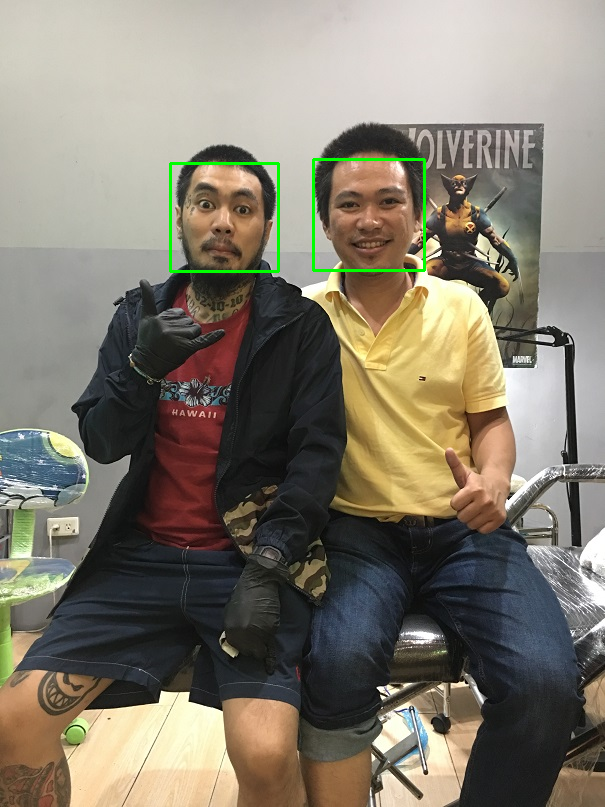

In [34]:
import cv2
import sys
from google.colab.patches import cv2_imshow

! pip install pydrive
# these classes allow you to request the Google drive API
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1wz2C-zb6u_fvC62UsNcuzy80HFeAZYhu'
downloaded = drive.CreateFile({'id': file_id})
# allows you to temporarily load your file in the notebook VM
# assume the file is called file.csv and it's located at the root of your drive
downloaded.GetContentFile('Test.jpg')



#cascPath = cv2.CascadeClassifier('opencv-3.0.0/data/harcascades/haarcascade_frontalface.xml')
# Create the haar cascade
#faceCascade = cv2.CascadeClassifier(cascPath)

cascPath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + cascPath)


# Read the image
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Detect faces in the image
faces = faceCascade.detectMultiScale(
   gray,
   scaleFactor=1.1,
   minNeighbors=5,
   minSize=(30, 30),
   flags = cv2.CASCADE_SCALE_IMAGE #flags = cv2.cv.CV_HAAR_SCALE_IMAGE
)


##print "Found {0} faces!".format(len(faces))

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

#cv2.imshow("Faces found", image)
cv2_imshow(image)




cv2.waitKey(0)
cv2.destroyAllWindows()


#$ python face_detect.py abba.png haarcascade_frontalface_default.xml

